In [1]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# 'StandardScalar' from sklearn.preprocessing library is used to scale the data
from sklearn.preprocessing import StandardScaler

# 'eig' from numpy.linalg to calculate eigenvalues and eigenvectors
from numpy.linalg import eig

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

# 'LDA' function to perform linear discriminant analysis using the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# import decision tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
import seaborn as sns

In [3]:
# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [4]:
# import various functions from sklearn 
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, DBSCAN

In [5]:
import matplotlib.cm as cm

In [6]:
# import 'Seaborn' 
import seaborn as sns

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id="prep"></a>
# Data Preparation

<a id="read"></a>
## Read the Data

#### Read the dataset and print the observations.

In [9]:
data_online = pd.read_csv('C:/Users/SAI/Desktop/Great Learning Assignments/USL/Mini - Project/USL - Mini - Question/online_shoppers_intention.csv')

In [10]:
data_online.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5001,1,7.000000,0,0.0,15,421.500000,0.000000,0.033333,0.0,0.6,May,3,2,1,3,Returning_Visitor,False,False
2491,7,245.333333,0,0.0,5,256.666667,0.027273,0.051818,0.0,0.0,May,1,1,3,3,Returning_Visitor,False,False
6115,0,0.000000,0,0.0,3,36.400000,0.066667,0.100000,0.0,0.0,June,3,2,1,13,Returning_Visitor,False,False
2699,0,0.000000,0,0.0,11,1055.500000,0.018182,0.042424,0.0,0.0,May,2,2,8,18,Returning_Visitor,False,False
8451,7,58.416667,0,0.0,22,1043.583333,0.014286,0.048810,0.0,0.0,Nov,2,2,3,2,New_Visitor,False,False


In [11]:
data_online['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [12]:
data_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

#### Compute dimensions of the data

In [13]:
data_online.shape

(12330, 18)

In [14]:
print('List of Numerical columns :')
print(data_online.select_dtypes(include = ['int','float']).columns.to_list(),'\n')

print('List of Categorical columns :')
print(data_online.select_dtypes(include = ['object', 'bool']).columns.to_list())

List of Numerical columns :
['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'] 

List of Categorical columns :
['Month', 'VisitorType', 'Weekend', 'Revenue']


## EXPLORATORY DATA ANALYSIS

### UNIVARIATE ANALYSIS:

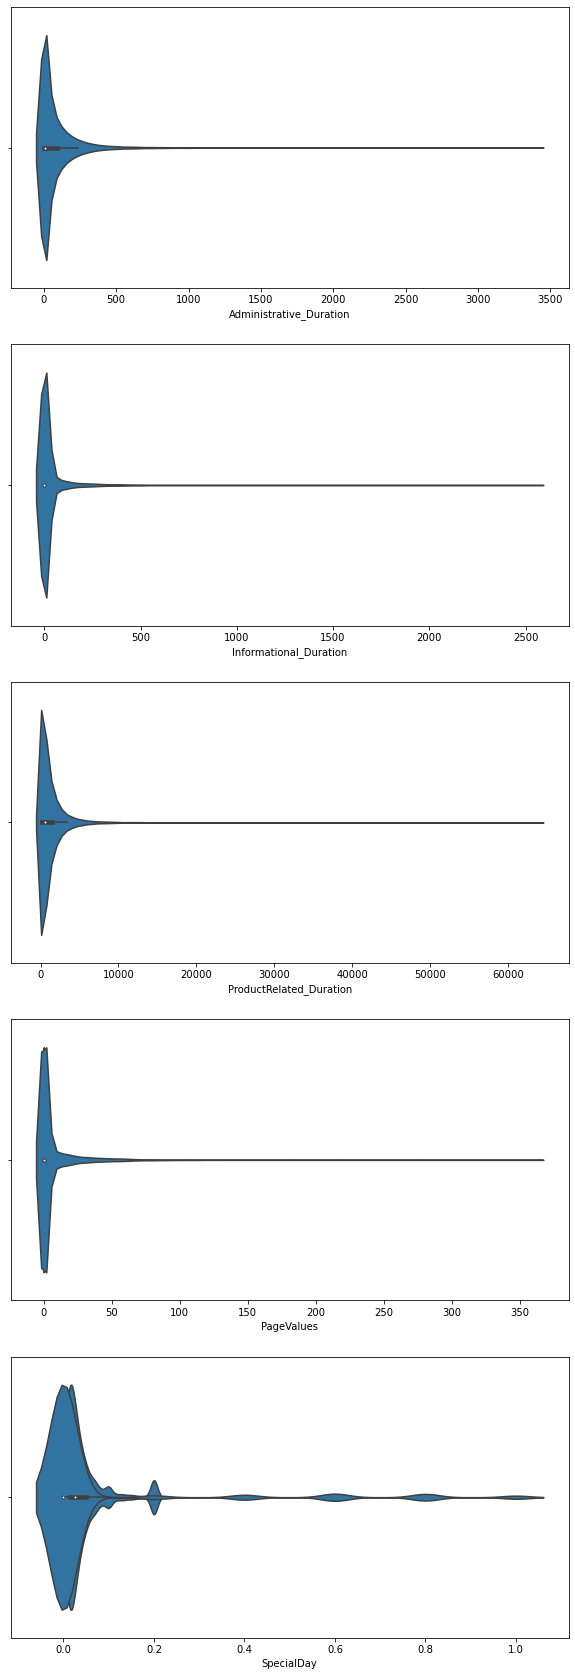

In [15]:
plt.figure(figsize = [10,30])
plt.subplot(5,1,1)
sns.violinplot(data_online['Administrative_Duration'])
plt.subplot(5,1,2)
sns.violinplot(data_online['Informational_Duration'])
plt.subplot(5,1,3)
sns.violinplot(data_online['ProductRelated_Duration'])
plt.subplot(5,1,4)
sns.violinplot(data_online['BounceRates'])
plt.subplot(5,1,5)
sns.violinplot(data_online['ExitRates'])
plt.subplot(5,1,4)
sns.violinplot(data_online['PageValues'])
plt.subplot(5,1,5)
sns.violinplot(data_online['SpecialDay'])
plt.show()

In [16]:
# From the above Univariate analysis, we can conclude the below inferences:
#  All the columns are Highly right skewed. Outlier treatments and Transformations are required before modelling

### BIVARIATE ANALYSIS

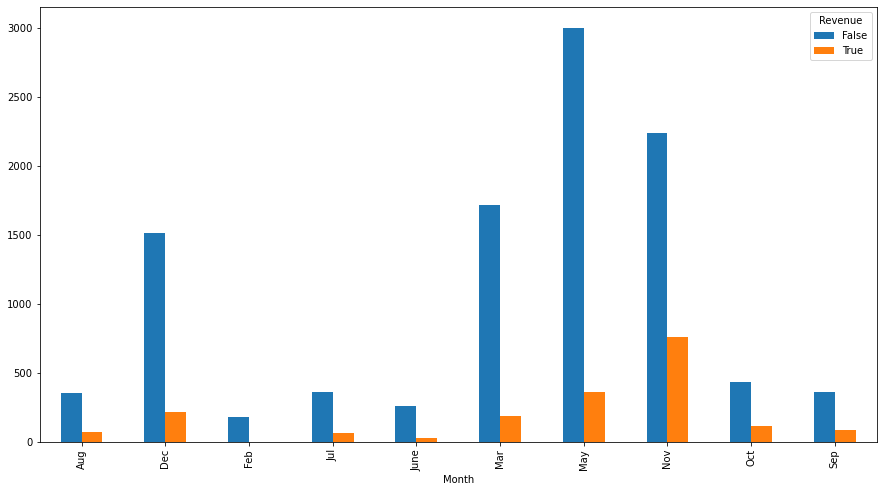

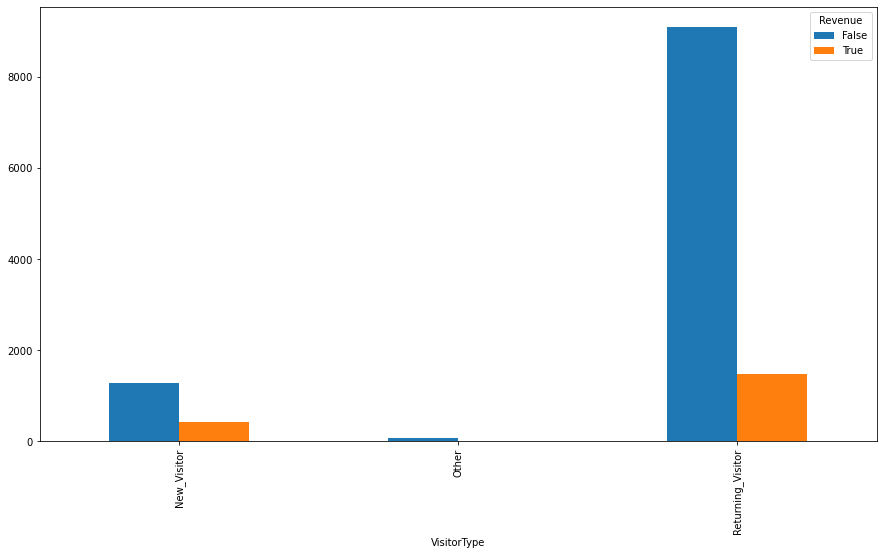

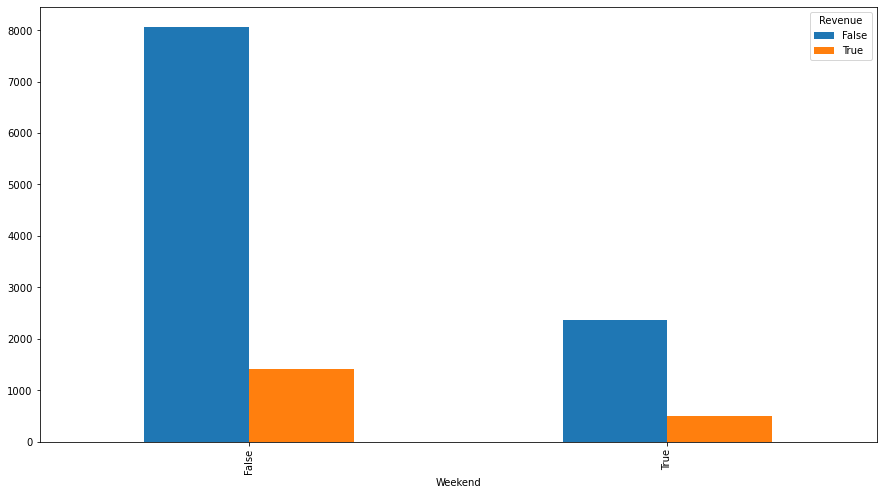

In [17]:
pd.crosstab(data_online['Month'], data_online['Revenue']).plot(kind='bar')
plt.show()
pd.crosstab(data_online['VisitorType'], data_online['Revenue']).plot(kind='bar')
plt.show()
pd.crosstab(data_online['Weekend'], data_online['Revenue']).plot(kind='bar')
plt.show()

In [18]:
# From these Bar plots, we can conclude on the below inferences.
# There is a high ratio of not generating any revenue from the above categories.
# In the 'Other' category of VisitorType column, there is not much observation .

### MULTIVARIATE ANALYSIS

<AxesSubplot:>

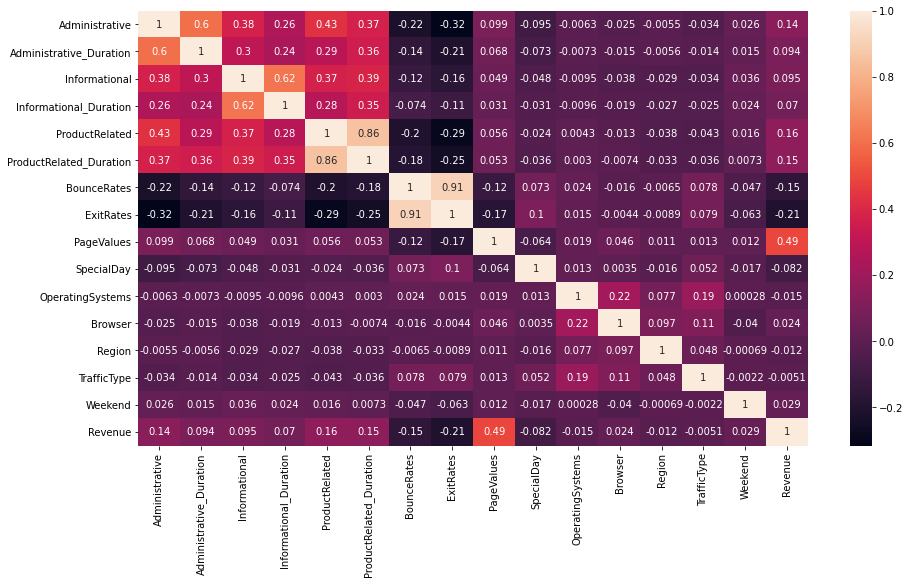

In [19]:
sns.heatmap(data_online.corr(), annot = True)

From the above chart we can infer that, there is a high +ve corr. between ProductRelated & ProductRelated_Duration and ExitRates & Bounce Rates.
There is a high -ve corr. between ExitRates, Administrative, ProductRelated, ProductRelated_Duration & Revenue.

In [20]:
data_online.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [21]:
for i in range(0, len(data_online['Weekend'])):
    if data_online['Weekend'][i] == 'True':
        data_online['Weekend'][i] = 1
    else:
        data_online['Weekend'][i] = 0
        
data_online['Weekend'] = data_online['Weekend'].astype('int')


In [22]:
for i in range(0, len(data_online['Revenue'])):
    if data_online['Revenue'][i] == 'True':
        data_online['Revenue'][i] = 1
    else:
        data_online['Revenue'][i] = 0
        
data_online['Revenue'] = data_online['Revenue'].astype('int')


In [23]:
for i in range(0, len(data_online['VisitorType'])):
    if data_online['VisitorType'][i] == 'Returning_Visitor':
        data_online['VisitorType'][i] = 2
    elif data_online['VisitorType'][i] == 'New_Visitor':
        data_online['VisitorType'][i] = 1
    else:
        data_online['VisitorType'][i] = 0
        
data_online['VisitorType'] = data_online['VisitorType'].astype('int')


In [24]:
cols = {'Month':'Month_en'}

for i,j in cols.items():
    encoding = data_online.groupby(i).size()
    encoding = encoding/len(data_online)
    data_online[j] = data_online[i].map(encoding)

In [25]:
data_online.drop(columns = ['Month'], 
          axis=1, inplace = True)

In [26]:
data_online.shape

(12330, 18)

In [27]:
data_online.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'Month_en'],
      dtype='object')

In [28]:
data_online.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int32
Weekend                      int32
Revenue                      int32
Month_en                   float64
dtype: object

There are no null values present in the data.

## DATA CLEANING

### OUTLIERS DETECTION AND TREATMENT

In [29]:
# write your code here
# calculate the first quartile
Q1 = data_online.quantile(0.25)

#calculate the third quartile
Q3 = data_online.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# remove the outliers from the dataframe
data_online = data_online[~((data_online < (Q1 - 1.5 * IQR)) | (data_online > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
data_online.shape

(2077, 18)

### FEATURE SCALING

In [30]:
# write your code here
# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
scaled_data = stdscaler.fit_transform(data_online)
print('Mean:' ,scaled_data.mean())
print('Variance:' ,scaled_data.var())

Mean: 7.150850701592514e-18
Variance: 0.5555555555555556


In [31]:
X = scaled_data

<a id="kmeans"></a>
# K-Means Clustering

Let us perform the centroid-based clustering algorithm (i.e. K-Means). Such algorithms are efficient but sensitive to initial conditions and outliers. K-means is the most widely-used centroid-based clustering algorithm.

In [32]:
# create several cluster combinations ranging from 1 to 20 and observe the wcss (Within Cluster Sum of Squares) for each cluster
# consider an empty list to store the WCSS
wcss  = []

# use for loop to perform K-means with different values of K
# set the 'random_state' to obtain the same centroid initialization for each code run
# fit the model on scaled data
# append the value of WCSS for each K to the list 'wcss'
# the 'inertia_' retuns the WCSS for specific value of K
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

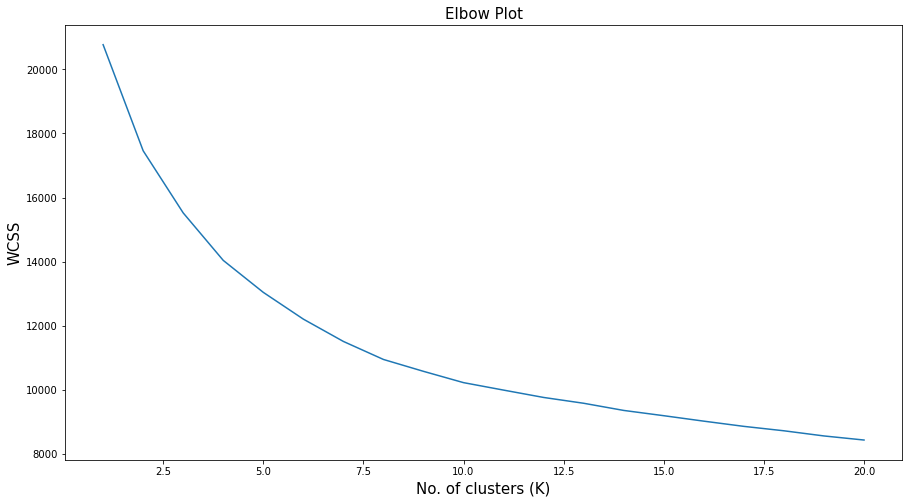

In [33]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,21), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

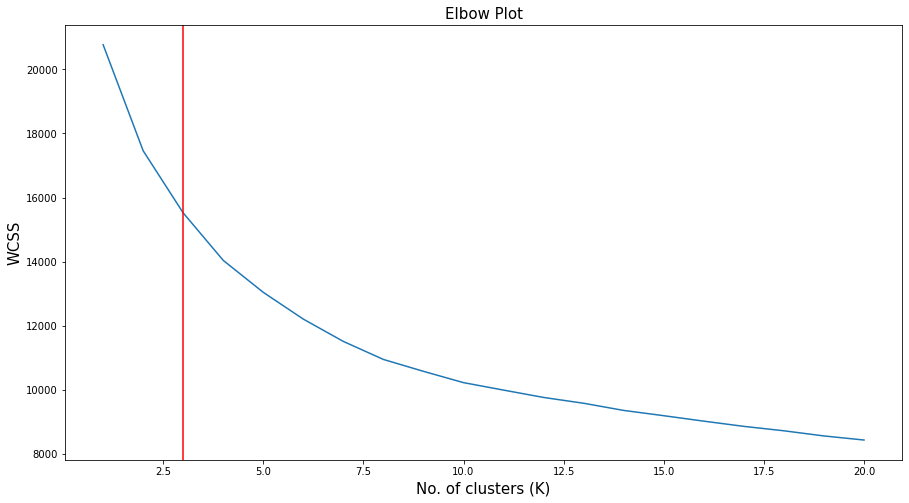

In [34]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,21), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# plot a vertical line at the elbow
plt.axvline(x = 3, color = 'red')

# display the plot
plt.show()

**Interpretation:** We can see that the for K = 3, there is an elbow in the plot. Before this elbow point, the WCSS is decreasing rapidly and after K = 3, the WCSS is decreasing slowly.

Now, let us use the silhouette score method to identify the optimal value of K.

<a id="silhouette"></a>
## Optimal Value of K Using Silhouette Score

The Silhouette score can also be used to identify the optimal number of clusters. We plot the Silhouette score for different values of K. The `K` with the highest Silhouette score represents the optimal value for the number of clusters (K).

In [35]:
# create a list for different values of K
n_clusters = [2, 3, 4, 5, 6,190]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(X)
    score = silhouette_score(X, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.1967587713344689)
For 3 clusters the silhouette score is 0.18243457444765357)
For 4 clusters the silhouette score is 0.166699959939125)
For 5 clusters the silhouette score is 0.14774262569360913)
For 6 clusters the silhouette score is 0.1525739851893675)
For 190 clusters the silhouette score is 0.150670661073841)


From the `silhouette score` it is suggesting the better value for the number of clusters to be `2`. Still we are not sure whether should weconsider the optimal value of `K` to be `2` or `3`, so let us plot a graph and visualize the silhouette scores.

In [36]:
    model = KMeans(n_clusters = 2, random_state = 10)
    
    # fit and predict on the scaled data
    cluster_labels = model.fit_predict(X)

    # the 'silhouette_score()' gives the average value for all the samples
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Compute the silhouette coefficient for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    sample_silhouette_values

array([0.28767855, 0.26142966, 0.27831689, ..., 0.19998275, 0.37821423,
       0.18025996])

#### Visualize the silhouette scores

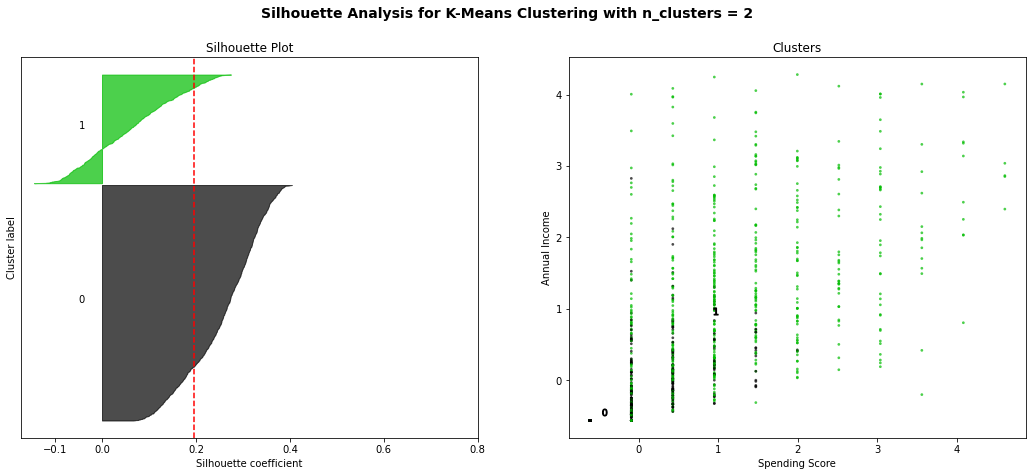

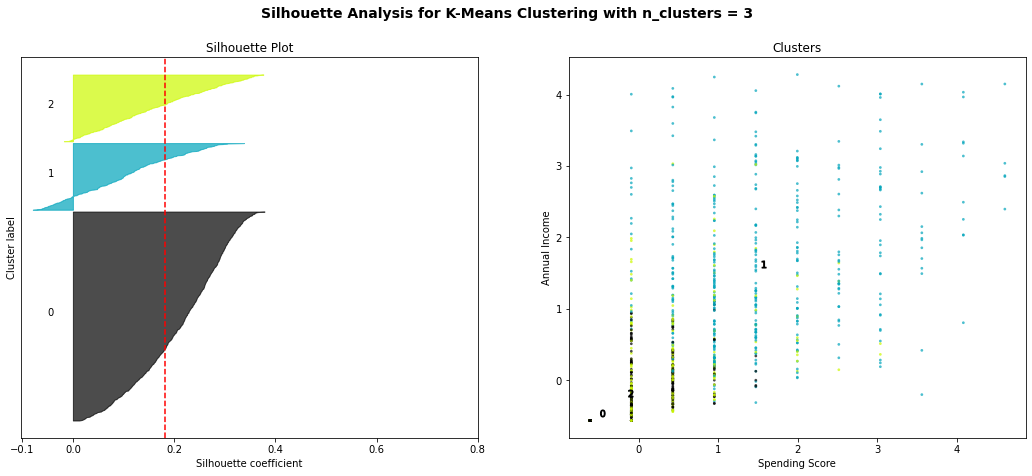

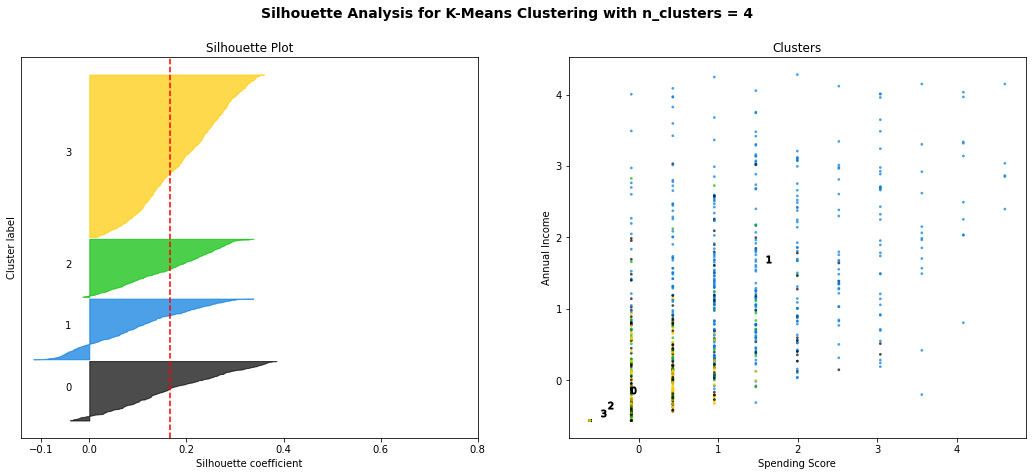

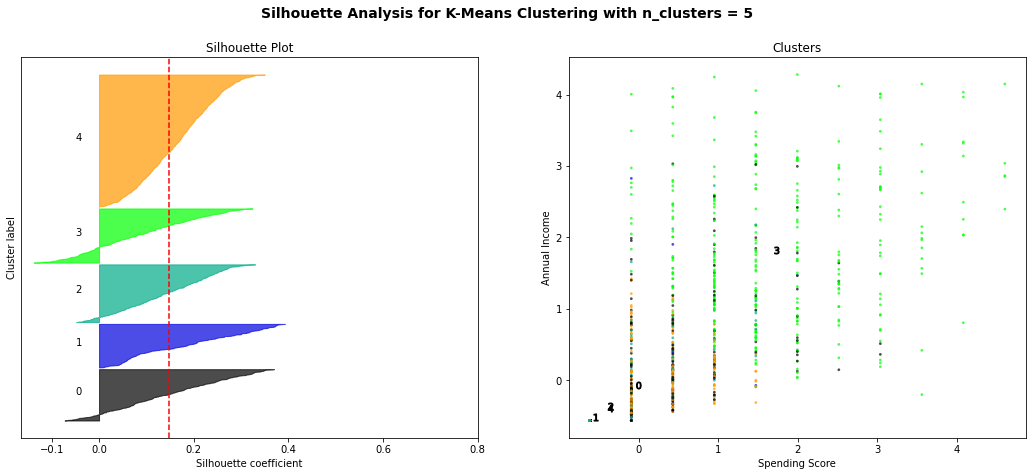

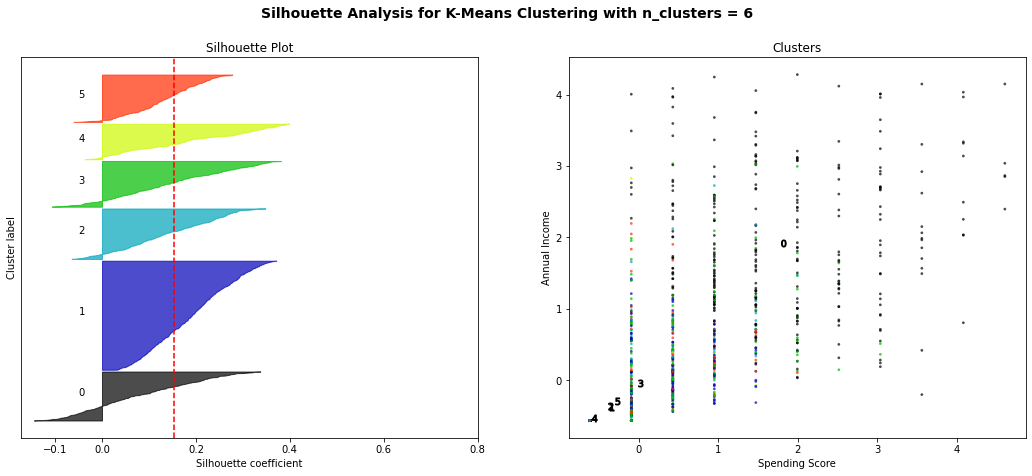

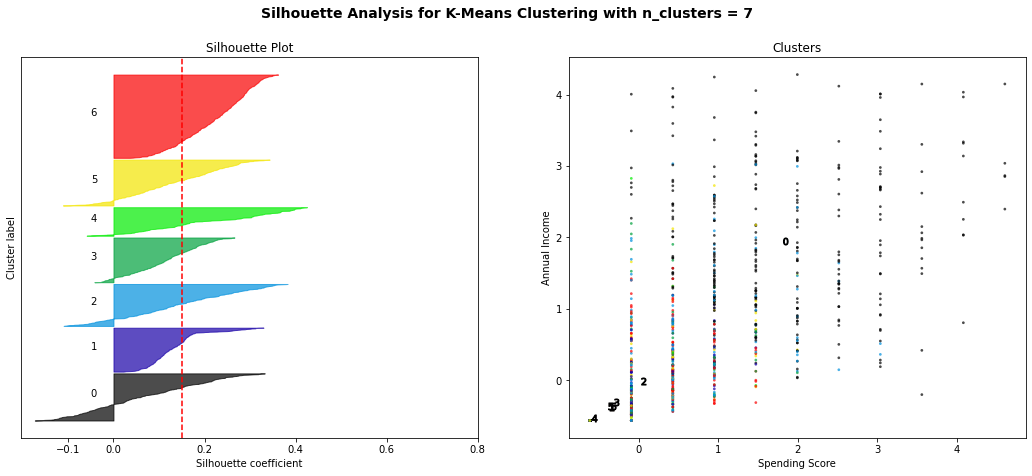

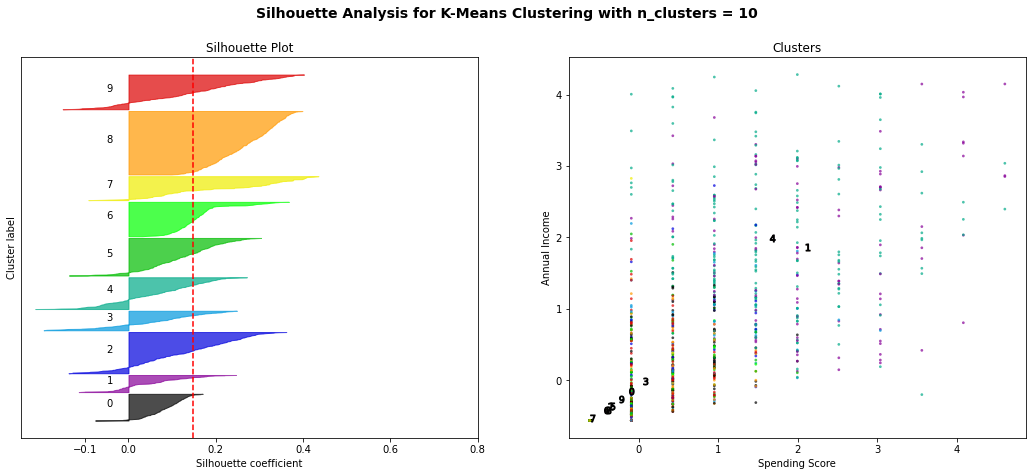

In [37]:
# consider the number of clusters
n_clusters = [2, 3, 4, 5, 6, 7, 10]

# consider an array of the data
X = np.array(X)

# for each value of K, plot the silhouette plot the clusters formed
for K in n_clusters:
    
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    # set the figure size
    fig.set_size_inches(18, 7)

    # the 1st subplot is the silhouette plot
    # initialize the cluster with 'K' value and a random generator
    model = KMeans(n_clusters = K, random_state = 10)
    
    # fit and predict on the scaled data
    cluster_labels = model.fit_predict(X)

    # the 'silhouette_score()' gives the average value for all the samples
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Compute the silhouette coefficient for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(K):
        
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        # sort the silhouette coefficient
        ith_cluster_silhouette_values.sort()
        
        # calculate the size of the cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # color each cluster 
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10 

    # set the axes and plot label
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # plot the vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # clear the y-axis ticks
    ax1.set_yticks([])  
    
    # set the ticks for x-axis 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

    
    # 2nd plot showing the actual clusters formed
    # consider different color for each cluster
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    
    # plot a scatter plot to visualize the clusters
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # label the cluster centers
    centers = model.cluster_centers_
    
    # display the cluster center with cluster number
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    # add the axes and plot title
    ax2.set_title("Clusters")
    ax2.set_xlabel("Spending Score")
    ax2.set_ylabel("Annual Income")
    
    # set the common title for subplots
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')

# display the plot
plt.show()

**Interpretation:** The above plot shows the silhouette plot and the clusters formed for each value of K. The plot shows that there are outliers (where the silhouette coefficient is less than 0) for K = 4, 5, 6, 7 and 10. We can choose between 2 and 3, but from the above plot we can observe that we can get better values for k = 3.

<a id="model"></a>
## Build the Clusters

Let us build the `3` clusters using K-menas clustering.

In [38]:
# build a K-Means model with 5 clusters
new_clusters = KMeans(n_clusters = 3, random_state = 10)

# fit the model
new_clusters.fit(X)

# append the cluster label for each point in the dataframe 'df_cust'
data_online['Cluster'] = new_clusters.labels_

In [39]:
data_online.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Month_en,Cluster
4587,3,75.0,0,0.0,3,74.000000,0.000000,0.020000,0.0,0.0,3,2,1,2,2,0,0,0.272830,1
5298,0,0.0,0,0.0,2,121.000000,0.000000,0.050000,0.0,0.0,3,2,1,3,2,0,0,0.272830,0
3791,0,0.0,0,0.0,15,304.166667,0.000000,0.040000,0.0,0.0,2,2,1,3,2,0,0,0.272830,0
5442,0,0.0,0,0.0,18,103.833333,0.033333,0.055556,0.0,0.0,2,2,3,3,2,0,0,0.272830,0
7918,2,83.6,0,0.0,43,1582.700000,0.004545,0.014394,0.0,0.0,3,2,3,1,2,0,0,0.243147,2


#### Check the size of each cluster

In [40]:
data_online.Cluster.value_counts()

0    1267
2     405
1     405
Name: Cluster, dtype: int64

**Plot a barplot to visualize the cluster sizes**

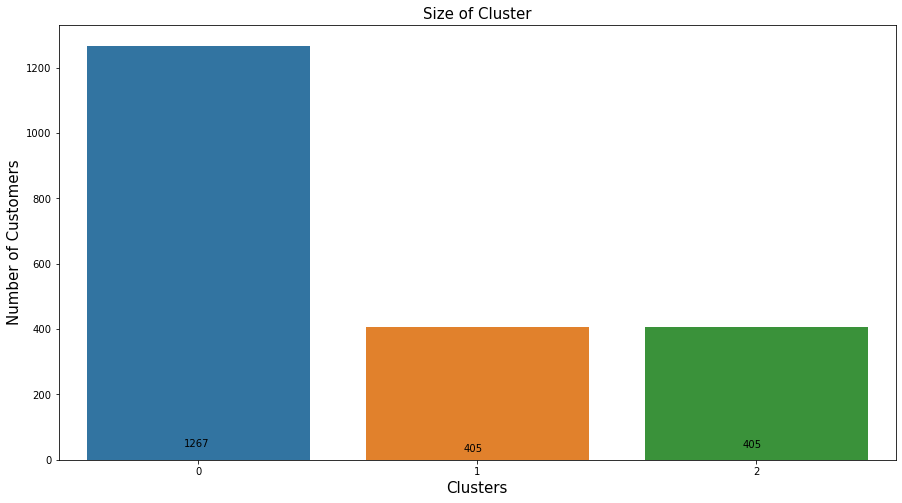

In [41]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= data_online, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.05, y =39, s = np.unique(new_clusters.labels_, return_counts=True)[1][0])
plt.text(x = 0.95, y =24, s = np.unique(new_clusters.labels_, return_counts=True)[1][1])
plt.text(x = 1.95, y =37, s = np.unique(new_clusters.labels_, return_counts=True)[1][2])

# display the plot
plt.show()

<a id="inter"></a>
## Analyze the Clusters

#### Let us visualize the clusters by considering the variables 'ProductRelated_Duration' and 'ProductRelated'.

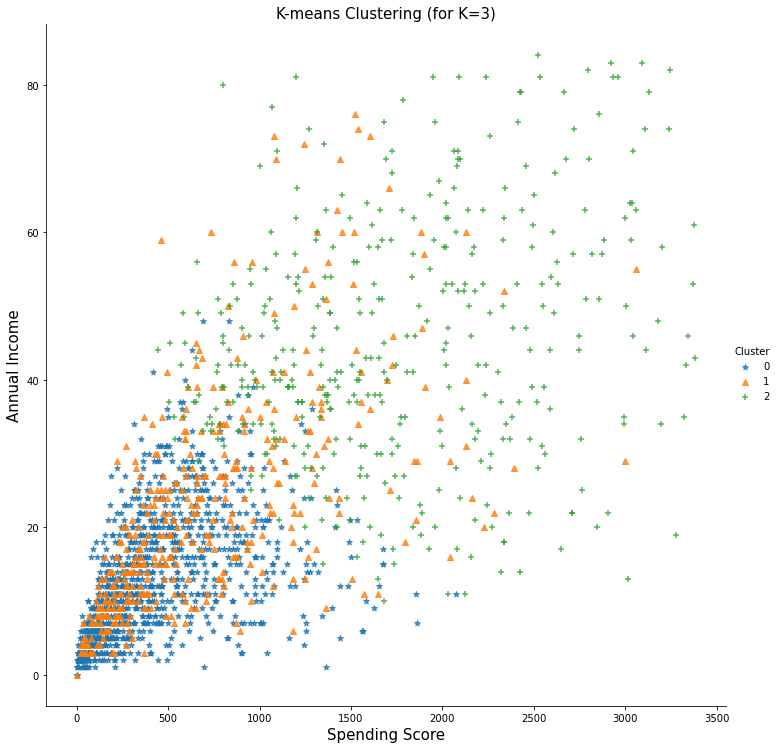

In [42]:
# plot the lmplot to visualize the clusters
# pass the different markers to display the points in each cluster with different shapes
# the 'hue' parameter returns colors for each cluster
sns.lmplot(x = 'ProductRelated_Duration', y = 'ProductRelated', data = data_online, hue = 'Cluster', 
                markers = ['*', '^', '+'], fit_reg = False, size = 10)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('K-means Clustering (for K=3)', fontsize = 15)
plt.xlabel('Spending Score', fontsize = 15)
plt.ylabel('Annual Income', fontsize = 15)

# display the plot
plt.show()

Now let us understand the summary statistics for each cluster.

### Cluster 1

#### Check the size of the cluster

In [43]:
# size of a cluster 1
len(data_online[data_online['Cluster'] == 0])

1267

#### Compute the statistical summary for the customers in this cluster

In [44]:
# statistical summary of the numerical variables
data_online[data_online.Cluster==0].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Month_en,Cluster
count,1267.000000,1267.000000,1267.0,1267.0,1267.000000,1267.000000,1267.000000,1267.000000,1267.0,1267.0,1267.000000,1267.0,1267.000000,1267.000000,1267.0,1267.0,1267.0,1267.000000,1267.0
mean,0.298343,4.694019,0.0,0.0,11.992897,378.632307,0.008027,0.041391,0.0,0.0,2.292028,2.0,3.007103,2.325178,2.0,0.0,0.0,0.177253,0.0
std,0.685684,12.671660,0.0,0.0,8.302959,341.475162,0.012043,0.025147,0.0,0.0,0.571817,0.0,2.176809,1.329584,0.0,0.0,0.0,0.081796,0.0
min,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,2.0,1.000000,1.000000,2.0,0.0,0.0,0.014923,0.0
25%,0.000000,0.000000,0.0,0.0,5.000000,112.000000,0.000000,0.022222,0.0,0.0,2.000000,2.0,1.000000,1.000000,2.0,0.0,0.0,0.140065,0.0
50%,0.000000,0.000000,0.0,0.0,10.000000,275.166667,0.000000,0.036364,0.0,0.0,2.000000,2.0,3.000000,2.000000,2.0,0.0,0.0,0.154663,0.0
75%,0.000000,0.000000,0.0,0.0,17.000000,549.641667,0.015385,0.055580,0.0,0.0,3.000000,2.0,4.000000,3.000000,2.0,0.0,0.0,0.243147,0.0
max,4.000000,79.750000,0.0,0.0,48.000000,2076.750000,0.041667,0.100000,0.0,0.0,4.000000,2.0,8.000000,7.000000,2.0,0.0,0.0,0.272830,0.0


**Interpretation:** The above summary shows that the average Administrative_Duration of the customers in this cluster is 4.694019. On average, their ProductRelated_Duration is 378.632307 and the BounceRates & ExitRates are 0.008027 & 0.041391  respectively. The avg. TrafficType is 2.325178.

### Cluster 2

#### Check the size of the cluster

In [45]:
# size of a cluster 2
len(data_online[data_online['Cluster'] == 1])

405

#### Compute the statistical summary for the customers in this cluster

In [46]:
# statistical summary of the numerical variables
data_online[data_online.Cluster==1].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Month_en,Cluster
count,405.000000,405.000000,405.0,405.0,405.000000,405.000000,405.000000,405.000000,405.0,405.0,405.000000,405.0,405.000000,405.000000,405.0,405.0,405.0,405.000000,405.0
mean,4.170370,104.952279,0.0,0.0,22.365432,697.852957,0.007113,0.023550,0.0,0.0,2.348148,2.0,3.234568,2.644444,2.0,0.0,0.0,0.162117,1.0
std,2.013103,50.758664,0.0,0.0,15.024396,543.076966,0.010195,0.015549,0.0,0.0,0.625195,0.0,2.240887,1.511343,0.0,0.0,0.0,0.090809,0.0
min,1.000000,12.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,2.0,1.000000,1.000000,2.0,0.0,0.0,0.014923,1.0
25%,3.000000,64.583333,0.0,0.0,11.000000,276.250000,0.000000,0.011111,0.0,0.0,2.000000,2.0,1.000000,1.000000,2.0,0.0,0.0,0.044526,1.0
50%,4.000000,97.000000,0.0,0.0,19.000000,572.976191,0.000000,0.020290,0.0,0.0,2.000000,2.0,3.000000,2.000000,2.0,0.0,0.0,0.154663,1.0
75%,5.000000,143.000000,0.0,0.0,30.000000,978.091667,0.012500,0.031907,0.0,0.0,3.000000,2.0,4.000000,4.000000,2.0,0.0,0.0,0.243147,1.0
max,10.000000,231.750000,0.0,0.0,76.000000,3057.045833,0.040351,0.100000,0.0,0.0,4.000000,2.0,8.000000,7.000000,2.0,0.0,0.0,0.272830,1.0


**Interpretation:** The above summary shows that the average Administrative_Duration of the customers in this cluster is 104.952279. On average, their ProductRelated_Duration is 697.852957 and the BounceRates & ExitRates are 0.007113 & 0.023550  respectively. The avg. TrafficType is 2.644444.

### Cluster 3

#### Check the size of the cluster

In [47]:
# size of a cluster 3
len(data_online[data_online['Cluster'] == 2])

405

#### Compute the statistical summary for the customers in this cluster

In [48]:
# statistical summary of the numerical variables
data_online[data_online.Cluster==2].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Month_en,Cluster
count,405.000000,405.000000,405.0,405.0,405.000000,405.000000,405.000000,405.000000,405.0,405.0,405.000000,405.0,405.000000,405.000000,405.0,405.0,405.0,405.000000,405.0
mean,0.967901,18.751488,0.0,0.0,44.590123,1761.106689,0.006637,0.022475,0.0,0.0,2.251852,2.0,2.869136,2.088889,2.0,0.0,0.0,0.177417,2.0
std,1.372090,31.110404,0.0,0.0,16.540377,707.892951,0.007777,0.013752,0.0,0.0,0.567937,0.0,2.151481,1.178185,0.0,0.0,0.0,0.081994,0.0
min,0.000000,0.000000,0.0,0.0,10.000000,441.791667,0.000000,0.000587,0.0,0.0,1.000000,2.0,1.000000,1.000000,2.0,0.0,0.0,0.014923,2.0
25%,0.000000,0.000000,0.0,0.0,33.000000,1199.616667,0.000000,0.012963,0.0,0.0,2.000000,2.0,1.000000,1.000000,2.0,0.0,0.0,0.140065,2.0
50%,0.000000,0.000000,0.0,0.0,42.000000,1671.375000,0.004545,0.019556,0.0,0.0,2.000000,2.0,2.000000,2.000000,2.0,0.0,0.0,0.154663,2.0
75%,2.000000,30.500000,0.0,0.0,56.000000,2264.333333,0.010000,0.030449,0.0,0.0,2.000000,2.0,4.000000,3.000000,2.0,0.0,0.0,0.243147,2.0
max,7.000000,172.000000,0.0,0.0,84.000000,3382.083333,0.039286,0.075556,0.0,0.0,4.000000,2.0,8.000000,7.000000,2.0,0.0,0.0,0.272830,2.0


**Interpretation:** The above summary shows that the average Administrative_Duration of the customers in this cluster is 18.751488. On average, their ProductRelated_Duration is 1761.106689 and the BounceRates & ExitRates are 0.006637 & 0.022475  respectively. The avg. TrafficType is 2.088889.

From the above clusters, we can infer that, the cluster == 1 has better values of Administrative_Duration and ProductRelated_Duration.

<a id='pca'></a>
# Principal Component Analysis (PCA)

It is an unsupervised dimension reduction technique used to transform the higher dimensional dataset to a lower dimension. It considers the linear combination of all the numerical variables and create principal components that are orthogonal to each other. These principal components explain most of the variance in the data with lower dimension. 

In [49]:
# generate the covariance matrix using 'cov' function
# consider the transpose of the dataframe 'df_attr_std' to obtain the covarinace between the independent variables (columns)  
cov_mat = np.cov(scaled_data.T)

# as 'cov_mat' is a numpy array, select first five observations with [0:5]
print(cov_mat[0:5])

[[ 1.00048170e+00  7.83448867e-01  0.00000000e+00  0.00000000e+00
   2.25535003e-01  1.52741142e-01 -1.33769289e-02 -2.50172317e-01
   0.00000000e+00  0.00000000e+00  1.83927998e-03  0.00000000e+00
   3.52788998e-02  7.68767457e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -7.70495300e-02]
 [ 7.83448867e-01  1.00048170e+00  0.00000000e+00  0.00000000e+00
   1.72558544e-01  1.47157915e-01 -3.88424671e-04 -2.31474987e-01
   0.00000000e+00  0.00000000e+00  5.29298727e-02  0.00000000e+00
   2.94654424e-02  4.61531289e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -8.01936769e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.

**Interpretation:** The covariance matrix is a square matrix of dimension 18x18. The diagonal entries correspond to the variance of each variable (which is always equal to 1, as we are using the standardized data) and the off-diagonal entries represent the covariances between the variables.

<a id='eigen'></a>
## Compute Eigenvalues and Eigenvectors 

Eigenvalues: The diagonal values of the diagonalized covariance matrix are the `eigenvalues` of the covariance matrix. Large eigenvalues correspond to the large variance in the data.<br>
                        
Eigenvectors: The eigenvectors corresponds to the eigenvalues give directions of the maximum variation in the data.

In [50]:
# use 'eig' function to compute eigenvalues and eigenvectors of the covariance matrix
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [2.3690992  0.20273523 0.26215401 1.47675085 0.50110323 1.24483333
 0.8411923  1.12661161 0.96722228 1.01311492 0.         0.
 0.         0.         0.         0.         0.         0.        ] 

Eigenvectors: 
 
 [[-0.45932428 -0.64380776 -0.30260996 -0.48423296 -0.06102873 -0.09353925
  -0.10688012  0.02269271 -0.14654697  0.05089203  0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [-0.44228988  0.62872846  0.307756   -0.50626157 -0.08439137 -0.11765556
  -0.16047271  0.02791192 -0.10172287  0.01492671  0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          1.


**Interpretation:** For the 18x18 covariance matrix, we get 18 eigenvalues and eigenvectors. The eigenvector corresponding to the largest eigenvalue represent the direction of the highest variation in the dataset.

<a id='components'></a>
## Decide Number of Principal Components

In [51]:
# create a list of eigenvalues
eig_val = list(eig_val)

# 'sort(reverse = True)' will sort the eigenvalues in the descending order
eig_val.sort(reverse = True)

# print the sorted list
print(eig_val)

[2.3690991954225344, 1.4767508529824975, 1.2448333291050062, 1.126611607312366, 1.0131149200970693, 0.9672222817704001, 0.8411923048718363, 0.5011032282243397, 0.26215400651541004, 0.20273522938254615, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


To decide the number of components, we can use different methods as: `Kaiser criterion`, `Scree plot`, `Percentage of Explained Variation`.

#### 1) Kaiser criterion: This criterion considers the number of pricipal components for which the eigenvalue is greater than 1. This criterion suffers a drawback of selecting more number of components as the eigenvalues very close to 1 may not contribute significantly in explaining the variation in the data.

Here the first five eigenvalues are greater than 1. Thus we can consider 5 principal components using kaiser criterion.

#### 2) Scree plot: Plot the eigenvalues and choose the number of components corresponding to the elbow point.

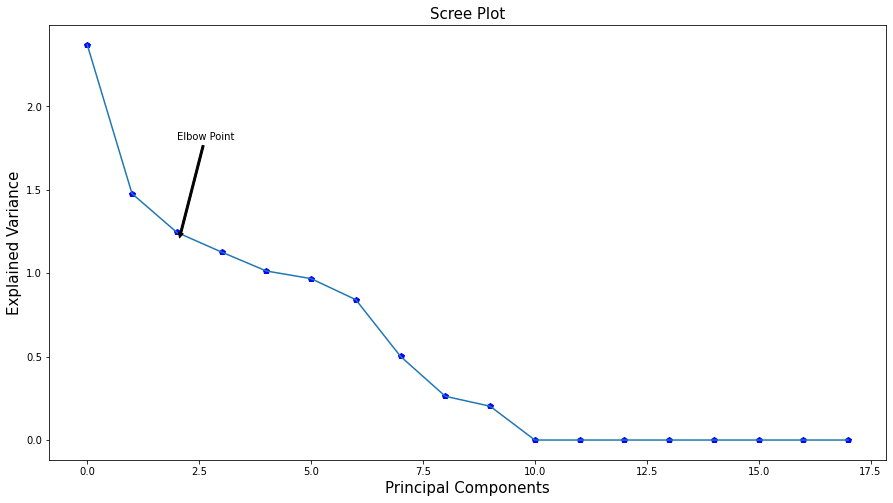

In [52]:
# 'bp' represents blue color and pentagonal shape of points
plt.plot(eig_val,'bp')            

# plot a line plot
plt.plot(eig_val) 

# set the axes and plot labels
# set the fontsize using 'fontsize'
plt.title('Scree Plot', fontsize = 15)
plt.xlabel('Principal Components', fontsize = 15)    
plt.ylabel('Explained Variance', fontsize = 15)      

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s ='Elbow Point', xy=(2.05,1.2), xytext=(2, 1.8), arrowprops=dict(facecolor='black', arrowstyle = 'simple'))

# display the plot
plt.show()   

**Interpretation**: It can be observed that, after the elbow point, the principal components do not contribute much to the variance in the data. 
The Kaiser criterion considers the number of principal components as 5, but the scree plot shows that only first three components explains most of the variation.

#### 3) Percentage of Explained Variation: Calculate the percentage of variation explained by each principal component. We consider the number of components that explain most of the variation.

The eigenvalue represents the total variance explained by that principal component. 

The proportion of variation explained by the i<sup>th</sup> principal component is calculated by taking the ratio of i<sup>th</sup> eigenvalue to the sum of all the eigenvalues. To calculate the percentage, multiply this ratio by 100.

In [53]:
# calculate the percentage of variation explained by each principal component
# create an empty list to store the percentage of variation explained by each principal component
percent_var = []

# use a 'for' loop to calculate the percentage of variation for each component
for i in eig_val:
    variation = (i/sum(eig_val))*100
    
    # add the values to the list 'percent_var'
    percent_var.append(variation)
    
# print the percentage of variation
percent_var

[23.67958560277893,
 14.760398511274273,
 12.442339871073637,
 11.260691847763471,
 10.126271420902826,
 9.667565994007472,
 8.407873013548064,
 5.0086196523530555,
 2.6202778889070366,
 2.0263761973912664,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

**Interpretation**: It can be seen that the first principal component explains 23.67% variation in the data.

Now calculate the cumulative percentage of variation.

In [55]:
# the 'cumsum()' returns the cumulative sum 
np.cumsum(percent_var)

array([ 23.6795856 ,  38.43998411,  50.88232399,  62.14301583,
        72.26928725,  81.93685325,  90.34472626,  95.35334591,
        97.9736238 , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        ])

**Interpretation**: We can see that the first five components explain approximately 72% of the variation in the data. By considering the 3 components as per the scree plot, the components explain approximately 50% of the variation. To explain 95% of the variation in the data, we need to consider ten principal components.

For this dataset, let us choose the `five` principal components that explain 72% of the variation.

Thus, we take the dot product of the scaled data and the eigenvectors corresponding to the first five eigenvalues to get the principal components. 

<a id='comp'></a>
## Principal Components 

In [56]:
# consider the eigenvectors corresponding to the first five highest eigenvalues
# these eigenvectors are the 1st, 2nd, 9th, 10th and 11th columns of 'eig_vec' 
eigenvector = eig_vec[:,[0,1,2,3,4]]

# print the vectors
eigenvector

array([[-0.45932428, -0.64380776, -0.30260996, -0.48423296, -0.06102873],
       [-0.44228988,  0.62872846,  0.307756  , -0.50626157, -0.08439137],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.47983103,  0.32847001, -0.65593613,  0.43515055, -0.09360572],
       [-0.43855283, -0.2768649 ,  0.59776816,  0.47456762, -0.32430976],
       [ 0.06768748, -0.02628679,  0.05988695,  0.02923779,  0.56711662],
       [ 0.40485894,  0.05003647, -0.14277012, -0.10028877, -0.72439289],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.00190146, -0.03948161, -0.02827118, -0.1316418 , -0.15543893],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.0153566 ,  0.00339614,  0.00599401, -0.07160467, -0.05473037],
       [-0.00964879,  0.02808427,  0.0

**Interpretation**: The first column in the above output represents the direction of maximum variation in the data. The second column represents the direction of the 2nd most highest variation in the data and so on.

Now generate a new dataset of reduced dimensions by multiplying standardize data and set of eigenvectors.

In [58]:
# take the dot product of 'df_attr_std' with 'eigenvector' to obtain new dataset
# create a dataframe of principal components
# pass the required column names to the parameter 'columns'
df_pca = pd.DataFrame(scaled_data.dot(eigenvector), columns= ['PC1','PC2', 'PC3', 'PC4', 'PC5'])

# head() to display top five rows
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,2.462016,0.092485,-0.208680,-0.698605,-1.881963
1,0.720776,0.203443,-0.220133,0.005648,1.118005
2,2.441624,0.047031,-0.233995,-1.137211,-2.213207
3,2.474551,0.125715,-0.221104,-0.869562,-1.879787
4,1.239616,-0.052052,0.188247,-1.035985,-0.150432


In [59]:
# check the shape of the transformed data
df_pca.shape

(2077, 5)

**Interpretation**: In the above step, we obtained the data with reduced dimensions. The new dataset has 2077 observations and 5 columns, i.e. we have decreased the number of features from 18 to 5.

Now, we use the in-built python function `PCA()` from the sci-kit learn library to calculate the principal components.

<a id='pcafunction'></a>
## PCA using Python Library 

Use the in-built PCA function from the sklearn library to perform PCA and check the results with the obtained data with reduced dimensions (using scratch method). We consider number of components = 5.

In [60]:
# specify the required no of components to the parameter 'n_components'
# pass the 'random_state' to get the same output for multiple runs
pca = PCA(n_components = 5, random_state = 10)

# the 'fit_transform()' fits the PCA on the data transforms the data to compute the principal components 
# pass the standardized data to fit PCA
components = pca.fit_transform(scaled_data)

In [61]:
# create a dataframe of principal components
# pass the required column names to the parameter 'columns'
df_pca_sklearn = pd.DataFrame(data = components, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# head() to display top five rows of the transformed data
df_pca_sklearn.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.462016,0.698605,0.347121,-1.658531,-1.027962
1,-0.720776,-0.005648,0.064029,-0.958318,-1.175991
2,-2.441624,1.137211,0.645462,-0.632461,-1.035784
3,-2.474551,0.869562,0.231405,-1.176446,-0.997061
4,-1.239616,1.035985,-0.943297,0.436176,-1.903163


In [62]:
# check the shpe of the new dataset
df_pca_sklearn.shape

(2077, 5)

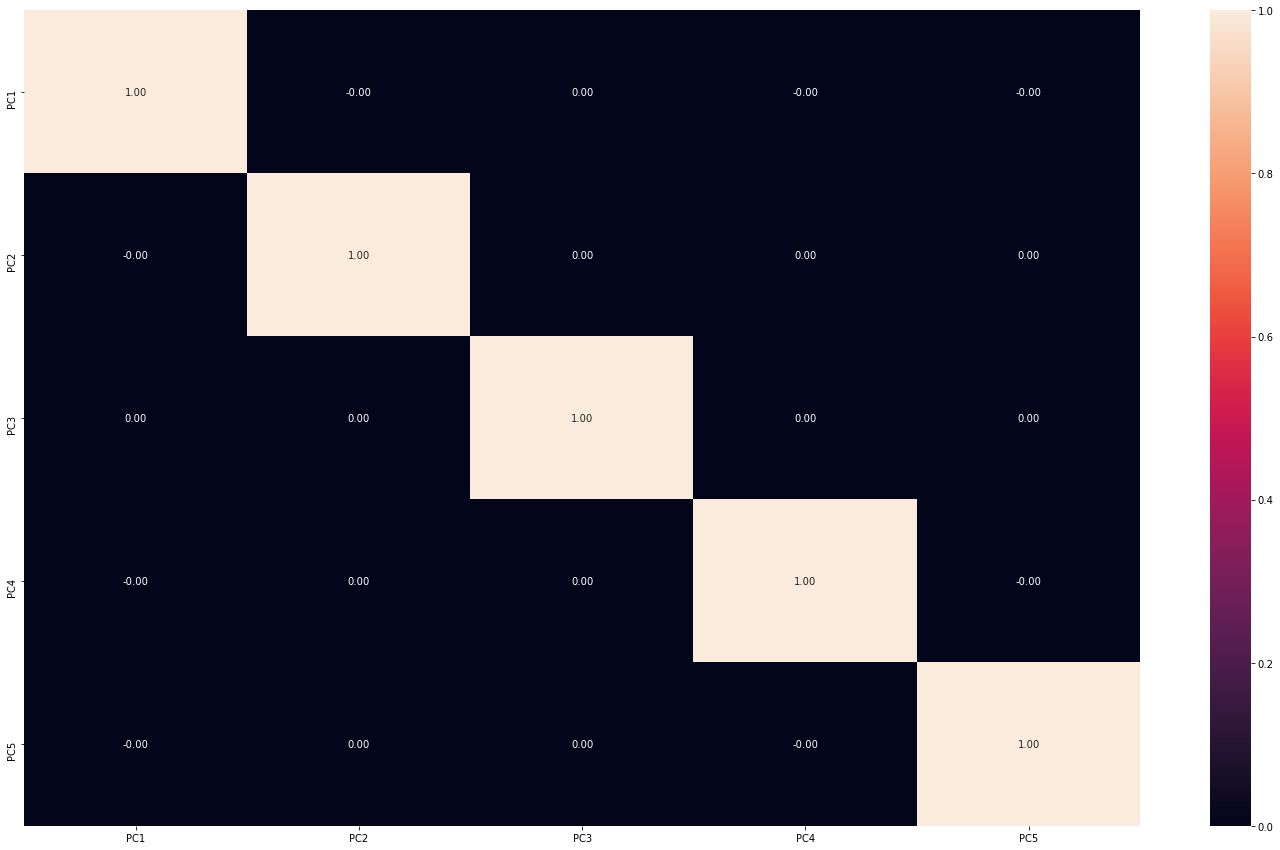

In [65]:
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_pca_sklearn.corr(), annot=True,fmt='.2f')
plt.show()

In [66]:
var_exp = pca.explained_variance_ratio_
var_exp

array([0.23679586, 0.14760399, 0.1244234 , 0.11260692, 0.10126271])

In [67]:
np.cumsum(var_exp)

array([0.23679586, 0.38439984, 0.50882324, 0.62143016, 0.72269287])

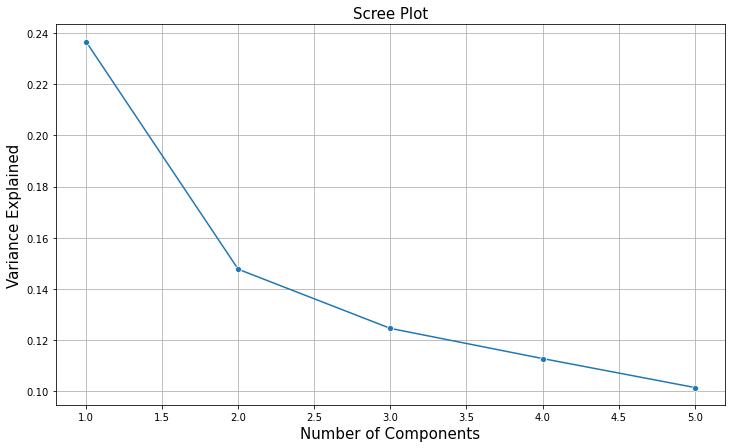

In [68]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [72]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(scaled_data))
df_pca_loading

,-0.618197,-0.564028,0.000000,-1.065830,-0.906672,-0.689654,2.805408,0.000000,-0.506910,0.000000,-0.926118,-0.252869,0.000000,-1.901796
,-0.618197,-0.564028,0.000000,-0.079578,-0.780140,0.747375,-0.412099,0.000000,-0.506910,0.000000,-0.926118,0.487906,0.000000,-1.901796
,-0.618197,-0.564028,0.000000,-1.065830,-0.901062,-0.689654,2.805408,0.000000,1.210630,0.000000,-0.011232,0.487906,0.000000,-1.901796
,-0.618197,-0.564028,0.000000,-1.065830,-0.951553,-0.689654,2.805408,0.000000,-0.506910,0.000000,-0.926118,0.487906,0.000000,-1.901796
,-0.618197,-0.564028,0.000000,-1.007815,-0.849168,-0.689654,-0.037970,0.000000,1.210630,0.000000,-0.926118,1.969457,0.000000,-1.901796
,1.470450,0.786223,0.000000,0.674614,0.596071,-0.429620,-1.053462,0.000000,-0.506910,0.000000,-0.926118,0.487906,0.000000,-1.901796
,-0.618197,-0.564028,0.000000,-1.007815,-0.887037,-0.689654,1.383719,0.000000,-2.224451,0.000000,1.361096,2.710233,0.000000,-1.901796
,-0.618197,-0.564028,0.000000,-0.717741,-0.702603,-0.689654,-0.393392,0.000000,-0.506910,0.000000,-0.926118,-0.993645,0.000000,-1.901796
,-0.618197,-0.564028,0.000000,-0.369652,-0.462769,0.610515,-0.241068,0.000000,-0.506910,0.000000,-0.926118,-0.993645,0.000000,-1.901796
,-0.618197,-0.564028,0.000000,1.834910,1.929603,0.710528,-0.591608,0.000000,-0.506910,0.000000,1.818538,-0.993645,0.000000,-1.901796
,-0.618197,-0.564028,0.000000,-0.717741,-0.452250,1.585643,0.939441,0.000000,1.210630,0.000000,-0.926118,1.228682,0.000000,-1.901796
